In [3]:
import numpy as np
import os


dir = r'D:\bcmi\EMBC\eeg_process\npydata_new'

subj = ['chenyi', 'huangwenjing', 'huangxingbao', 'huatong', 'wuwenrui', 'yinhao']

data = np.load(os.path.join(dir, subj[0]+'_data_de.npy'))[0]

data.shape

(360, 62, 5, 5)

In [4]:
label = np.load(os.path.join(dir, subj[0]+'_label.npy'))

label.shape

(360,)

In [29]:
from sklearn.preprocessing import StandardScaler


# (360, 5)
pdata = []

pnegdata = []
pneudata = []
pposdata = []

for i in range(360):
    # (5, )
    d = []
    for b in range(5):
        # (62, )
        s1 = []
        for c in range(62):
            s1.append(np.average(data[i][c][b]))
        
        d.append(np.average(s1))
    
    if label[i] == 0:
        pnegdata.append(d)
    elif label[i] == 1:
        pneudata.append(d)
    else:
        pposdata.append(d)

neg = len(pnegdata)
neu = len(pneudata)
pos = len(pposdata)

pdata = np.array(pnegdata+pneudata+pposdata)

scaler = StandardScaler()
pdata_norm = scaler.fit_transform(pdata)

pdata.shape, neg, neu, pos

((360, 5), 132, 88, 140)

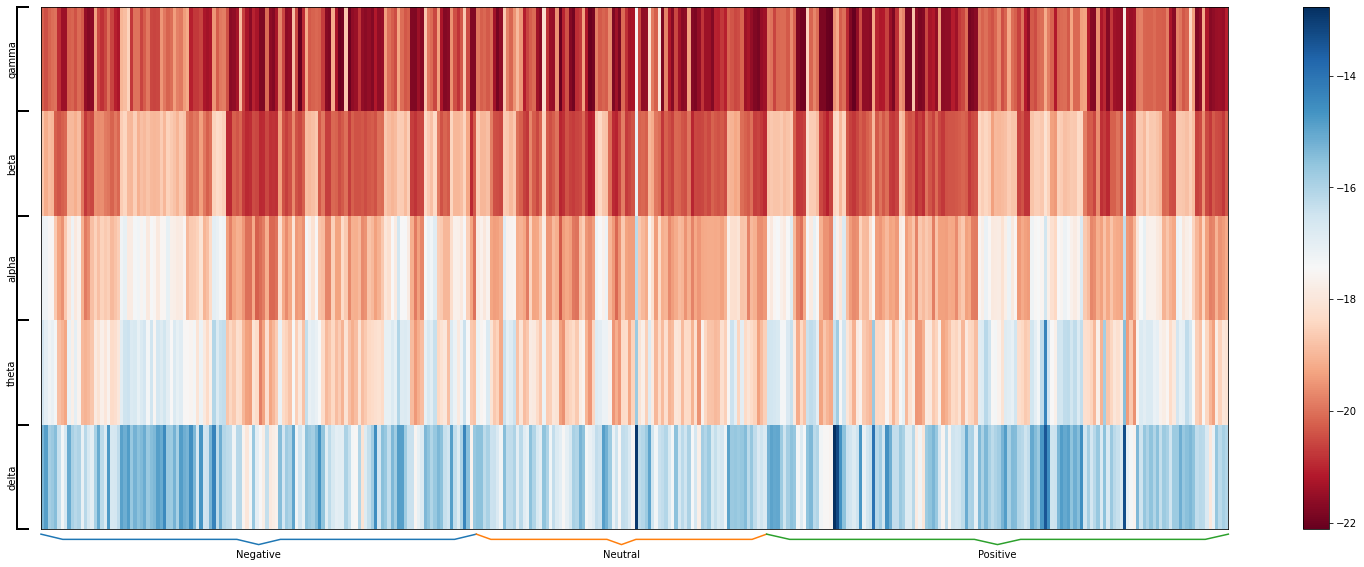

In [28]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches


def add_label_band(ax, top, bottom, label, *, spine_pos=-0.02, tip_pos=-0.01):
    """
    Helper function to add bracket around y-tick labels.

    Parameters
    ----------
    ax : matplotlib.Axes
        The axes to add the bracket to

    top, bottom : floats
        The positions in *data* space to bracket on the y-axis

    label : str
        The label to add to the bracket

    spine_pos, tip_pos : float, optional
        The position in *axes fraction* of the spine and tips of the bracket.
        These will typically be negative

    Returns
    -------
    bracket : matplotlib.patches.PathPatch
        The "bracket" Aritst.  Modify this Artist to change the color etc of
        the bracket from the defaults.

    txt : matplotlib.text.Text
        The label Artist.  Modify this to change the color etc of the label
        from the defaults.

    """
    # grab the yaxis blended transform
    transform = ax.get_yaxis_transform()

    # add the bracket
    bracket = mpatches.PathPatch(
        mpath.Path(
            [
                [tip_pos, top],
                [spine_pos, top],
                [spine_pos, bottom],
                [tip_pos, bottom],
            ]
        ),
        transform=transform,
        clip_on=False,
        facecolor="none",
        edgecolor="k",
        linewidth=2,
    )
    ax.add_artist(bracket)

    # add the label
    txt = ax.text(
        spine_pos,
        (top + bottom) / 2,
        label,
        ha="right",
        va="center",
        rotation="vertical",
        clip_on=False,
        transform=transform,
    )

    return bracket, txt

def bracket(ax, pos=[0,0], scalex=1, scaley=1, text="",textkw = {}, linekw = {}):
    x = np.array([0, 0.05, 0.45, 0.5])
    y = np.array([0, -0.01, -0.01, -0.02])
    x = np.concatenate((x, x+0.5)) 
    y = np.concatenate((y, y[::-1]))
    ax.plot(x*scalex+pos[0], y*scaley+pos[1], clip_on=False,
            transform=ax.get_xaxis_transform(), **linekw)
    ax.text(pos[0]+0.5*scalex, (y.min()-0.01)*scaley+pos[1], text, 
            transform=ax.get_xaxis_transform(),
            ha="center", va="top", **textkw)


plt.rcParams['figure.figsize'] = (26.6, 9.6)

fig, ax = plt.subplots()
pcm = ax.pcolormesh(pdata.T, cmap='RdBu')

ax.set_xticks([])
ax.set_yticks([])
ax.set_title('DE')

bracket(ax, text='Negative', pos=[0, -0.01], scalex=neg)
bracket(ax, text='Neutral', pos=[neg, -0.01], scalex=neu)
bracket(ax, text='Positive', pos=[neg+neu, -0.01], scalex=pos)

add_label_band(ax, 0, 1, 'delta')
add_label_band(ax, 1, 2, 'theta')
add_label_band(ax, 2, 3, 'alpha')
add_label_band(ax, 3, 4, 'beta')
add_label_band(ax, 4, 5, 'gamma')

fig.colorbar(pcm, ax=ax)

plt.show()


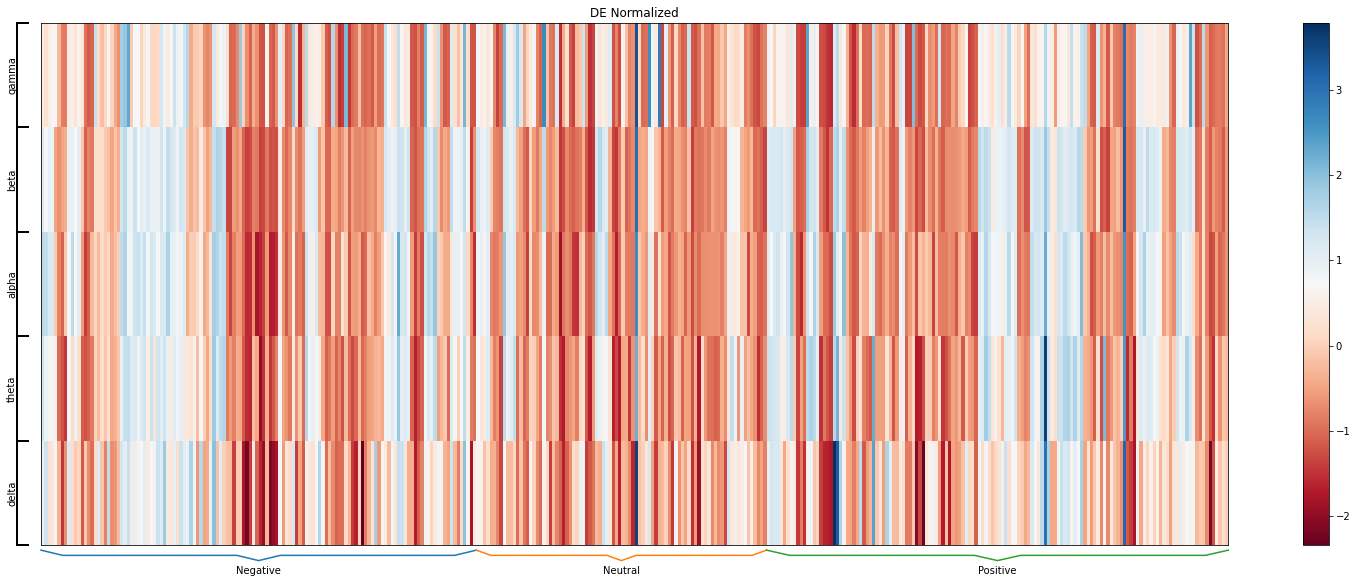

In [33]:
fig1, ax1 = plt.subplots()
pcm1 = ax1.pcolormesh(pdata_norm.T, cmap='RdBu')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('DE Normalized')

bracket(ax1, text='Negative', pos=[0, -0.01], scalex=neg)
bracket(ax1, text='Neutral', pos=[neg, -0.01], scalex=neu)
bracket(ax1, text='Positive', pos=[neg+neu, -0.01], scalex=pos)

add_label_band(ax1, 0, 1, 'delta')
add_label_band(ax1, 1, 2, 'theta')
add_label_band(ax1, 2, 3, 'alpha')
add_label_band(ax1, 3, 4, 'beta')
add_label_band(ax1, 4, 5, 'gamma')

fig1.colorbar(pcm1, ax=ax1)

plt.show()